In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

**Data Loading** 
we are importing a CIFAR-10 dataset which consists of 60,000 32*32 images in classes, with 6000 images per class.(Training::50,000, Testing::10,000)

In [ ]:
import torchvision
import torchvision.transforms as transforms # Transforms :: apply when we want to do some function on the given data.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transforms.ToTensor())

Files already downloaded and verified


In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)# Shuffle mean outoff 4 batches images chosen randomly
# shuffle is useful when we use large datasets
# if we do not shuffle then the whole training processes is repeatative tends to not much improvement in model.
# help to avoid local minima.

In [ ]:
dataiter = iter(trainloader)  #use to iterate the trainloader over 4 batches of given dataset.
images, labels = dataiter.next() # Now we get 1 instance of 4 images and their corresponding labels in dataset.

print(images.shape) # it gives dimensions of our images 32*32*3*4.(image size=32*32, Color image size(depth)=3, Batches=4).

print(images[1].shape)
print(labels[1].item())


torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
7


**Visualise data**

In [ ]:
img = images[0] # here we can change the type of image.
print(type(img))

<class 'torch.Tensor'>


In [ ]:
npimg = img.numpy() # coverting image into numpy for visualization purpose.
print(npimg.shape)

(3, 32, 32)


In [ ]:
npimg = np.transpose(npimg, (1, 2, 0)) # transpose means any permutation of axis(Filp the Row and Column).
print(npimg.shape)

(32, 32, 3)


*   index of x axis = 1
*   index of y axis= 2
*   index of z axis = 0

Above all index comes from npimg shape which is(3*32*32)



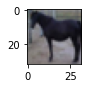

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(npimg)
plt.show()

In [ ]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

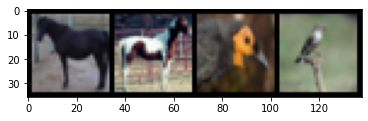

horse horse bird bird


In [ ]:
imshow(torchvision.utils.make_grid(images)) # here "torchvision.utils.make_grid(images)" this makes a singlegrid out of a provided tensor containing a list of images of the same size.
print(' '.join(classes[labels[j]] for j in range(4)))# here we call classes of images

In [ ]:
import torch.nn as nn

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN, self).__init__() # parent class.
    self.convl = nn.Conv2d(3, 16, 3, padding=(1,1), stride = (2,2)) # padding=(1,1) , Stride = (2,2), No of channels=3(RGB image dataset),Output channels = 16, kernel/Mask/Filter(size) = 3

  def forward(self, x):
    x = self.convl(x)
    return x

In [ ]:
net = FirstCNN()


In [ ]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [ ]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


* Neurons = 16
* depth of image = 3
* kernel size = 3
* Bias = 16

In [ ]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


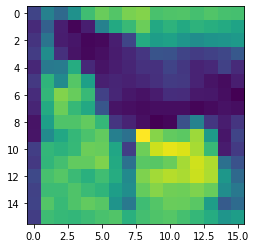

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

**Deep convolutional Network**

In [ ]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2, self).__init__()
    self.model = nn.Sequential(   # by using "Sequential" we stack up multiple Conv2d.
        nn.Conv2d(3, 8, 3), # input channels=3, Output = 8, kernel size = 3*3. #(N, 3, 32, 32)--->>>(N, 8, 30, 30)
        nn.Conv2d(8, 16, 3) # now we have 8 inputs because in previous step we get the output count of 8, Output = 16, kernel = 3*3. #(N, 8, 30, 30)-->>(N, 16, 28, 28)
    )

  def forward(self, x):
    x = self.model(x)
    return x

In [ ]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

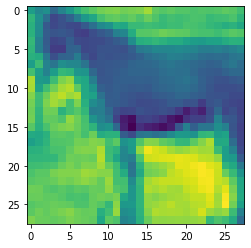

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())


In [ ]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 6, 5),                    # at the start(N, 3, 32, 32)-->> (N, 6, 28, 28)
        nn.AvgPool2d(2, stride=2),             # it does not change output just changes the dimensions of the image(N, 6, 28, 28)-->>(N, 6, 14, 14).
        nn.Conv2d(6, 16, 5),                   # (N, 6, 14, 14)-->>((N, 16, 10, 10)).
        nn.AvgPool2d(2, stride=2)                # (N, 16, 10, 10)-->>(N, 16, 5, 5)
    )

  def forward(self, x):
    x = self.model(x)
    return x


In [ ]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

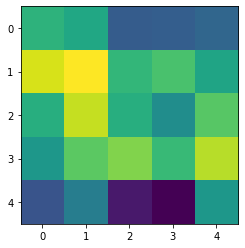

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())

**LeNet**
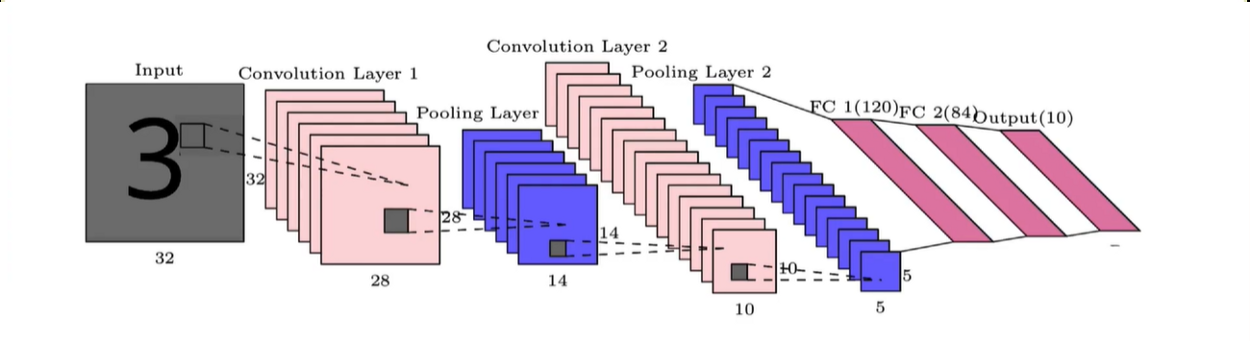

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5),
        nn.AvgPool2d(2, stride=2)
    )

# above code is for "Convolution layer1", "Pooling Layer1", "Convolution layer2", "Pooling Layer2".

    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
# Now above code used for Fully connected neural network("FC1", "FC2","Output").
  
  
  def forward(self, x): # function call
    print(x.shape)
    x = self.cnn_model(x)
    print(x.shape)
    x = x.view(x.size(0), -1)
    print(x.shape)
    x = self.fc_model(x)
    print(x.shape)
    return x


In [ ]:
net =LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [ ]:
print(out)

tensor([[-0.0638, -0.1029,  0.0314, -0.0380,  0.0079,  0.0951,  0.0572,  0.0909,
         -0.0653, -0.0243],
        [-0.0659, -0.1150,  0.0272, -0.0399,  0.0028,  0.1088,  0.0720,  0.0909,
         -0.0820, -0.0257],
        [-0.0846, -0.0885,  0.0233, -0.0206, -0.0105,  0.1170,  0.0389,  0.0781,
         -0.0600, -0.0194],
        [-0.0701, -0.1041,  0.0198, -0.0293,  0.0088,  0.1066,  0.0594,  0.0857,
         -0.0672, -0.0405]], grad_fn=<AddmmBackward0>)


In [ ]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([5, 5, 5, 5])


In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5),
        nn.AvgPool2d(2, stride=2)
    )

# above code is for "Convolution layer1", "Pooling Layer1", "Convolution layer2", "Pooling Layer2".

    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
# Now above code used for Fully connected neural network("FC1", "FC2","Output").
  
  
  def forward(self, x): # function call
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x


In [ ]:
batch_size=128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False) # No need to add shuffle because we trained our model with "shuffle=True".

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def evaluation(dataloader): # It computes Accuracy of given Model.
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [ ]:
net = LeNet()

In [ ]:
import torch.optim as optim

In [ ]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
#%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):

    inputs, lables = data

    opt.zero_grad()

    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    loss_arr.append(loss.item())

  loss_epoch_arr.append(loss.item())
  print('Epoch: %d%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()


ValueError: ignored